In [1]:
from discopy import Ob, Ty, Box, drawing, Id, Swap, Diagram, Functor, Dim, Tensor, Cup, Cap, tensor, Word, pregroup

# Drawing cooking recipes

An `Ob` (_object_) can be thought of as a basic ingredient in a recipe, it is defined only by its name, e.g. `'egg'`, `'sentence'`, `'qubit'`, etc.
A `Ty` (_type_) is simply a sequence of objects, i.e. a bunch of ingredients side by side, e.g. `Ty('egg', 'qubit')` represents an egg next to a qubit.
Types form a monoid with `@` (_tensor_) as product and `Ty()` (_the empty type_) as unit.
For example:

In [2]:
egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')

assert egg.objects == [Ob('egg')]
assert white @ yolk == Ty(Ob('white'), Ob('yolk'))

assert egg @ Ty() == egg == Ty() @ egg
assert egg @ (white @ yolk) == (egg @ white) @ yolk

Once we have defined some types, we can draw a `Box` with some types as `dom` (_domain_) and `cod` (_codomain_) which represent the inputs and outputs of a process. Note that we draw all our diagrams top to bottom.

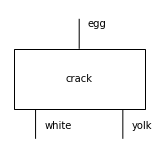

In [3]:
crack = Box('crack', dom=egg, cod=white @ yolk)

crack.draw(figsize=(2, 2))

We can put boxes side by side with `@` (_tensor_) and compose them in sequence with `>>` (_then_).

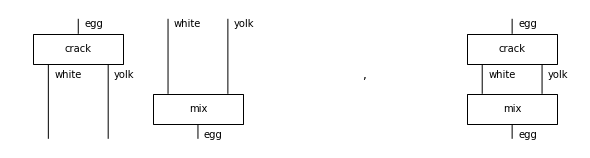

In [4]:
mix = Box('mix', white @ yolk, egg)

crack_tensor_mix = crack @ mix
crack_then_mix = crack >> mix

drawing.equation(crack_tensor_mix, crack_then_mix, space=2, symbol=', ', figsize=(8, 2))

We can draw the `Id` (_identity_) for a type, i.e. just some parallel wires. Composing with an identity does nothing. Tensoring with `Id(Ty())` (_the empty diagram_) does nothing either.

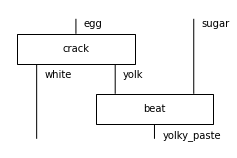

In [5]:
assert crack >> Id(white @ yolk) == crack == Id(egg) >> crack
assert crack @ Id(Ty()) == crack == Id(Ty()) @ crack

sugar, yolky_paste = Ty('sugar'), Ty('yolky_paste')
beat = Box('beat', yolk @ sugar, yolky_paste)

crack_then_beat = crack @ Id(sugar) >> Id(white) @ beat

crack_then_beat.draw(figsize=(3, 2))

We can change the order of ingredients using special boxes called `Swap`. This is needed for cooking indeed some recipes cannot be written on the plane. For example:

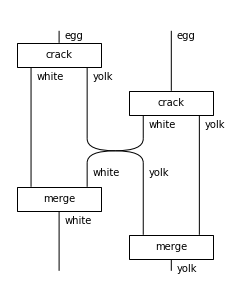

In [6]:
merge = lambda x: Box('merge', x @ x, x)

crack_two_eggs = crack @ crack\
    >> Id(white) @ Swap(yolk, white) @ Id(yolk)\
    >> merge(white) @ merge(yolk)

crack_two_eggs.draw(figsize=(3, 4))

## Exercise 1.1 : 

Draw your favorite cooking recipe as a diagram. You'll want to keep your ingredients in order if you want to avoid swapping them too much.

<img src="imgs/chocmousse.jpg" alt="chocmousse" width="200"/>

Chocolate Mousse Ref [1] (https://www.recipetineats.com/chocolate-mousse/)

In [35]:
sugar = Ty('sugar')
foam = Ty('foam')
whisk = Box('whisk', dom= sugar @ white, cod= foam)

chocolate = Ty('chocolate')
melted_choc = Ty('melted_choc')
melt = Box('melt', dom=chocolate, cod= melted_choc)

cream = Ty('cream')
choc_cream = Ty('choc_cream')
mix = Box('mix', dom=yolk @ cream @ melted_choc, cod= choc_cream)

choc_mousse = Ty('choc_mousse')
fold = Box('fold', dom=foam @ choc_cream, cod= choc_mousse)

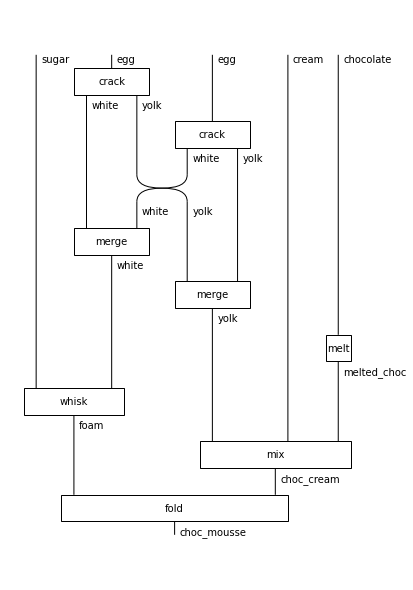

In [36]:
bake_choc_mousse = Id(sugar) @ crack_two_eggs @ Id(cream) @ melt\
    >> whisk @ mix\
    >> fold

bake_choc_mousse.draw(figsize=(5, 8))

**Reading:** Check out Pawel's blogpost [Crema di mascarpone and diagrammatic reasoning](https://graphicallinearalgebra.net/2015/05/06/crema-di-mascarpone-rules-of-the-game-part-2-and-diagrammatic-reasoning/).

## Exercise 1.2 
Define a function that takes a number `n` and returns the recipe of a tiramisu with `n` layers of crema di mascarpone and savoiardi.

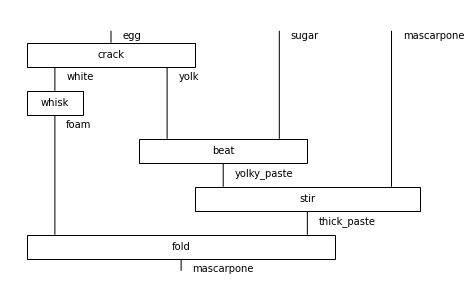

In [10]:
egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')
sugar, mascarpone, foam = Ty('sugar'), Ty('mascarpone'), Ty('foam')
yolky_paste, thick_paste = Ty('yolky_paste'), Ty('thick_paste')
mascarpone = Ty('mascarpone')

crack = Box('crack', egg, white @ yolk)
beat = Box('beat', yolk @ sugar, yolky_paste)
whisk = Box('whisk', white, foam)
stir = Box('stir', yolky_paste @ mascarpone, thick_paste)
fold = Box('fold', foam @ thick_paste, mascarpone)


make_mascarpone = crack @ Id(sugar @ mascarpone)\
    >> whisk @ beat @ Id(mascarpone)\
    >> Id(foam) @ stir\
    >> fold

make_mascarpone.draw(aspect='auto')

In [11]:
savoiardi = Ty('savoiardi')
tiramisu =  Ty('tiramisu')

take = lambda x: Box('take', x , x @ x)
store = lambda x: Box("store", x, Ty())
stack = Box('stack',  savoiardi @ tiramisu, tiramisu)
spread = lambda x: Box('spread', x @ mascarpone, tiramisu)

tiramisu_first_layer = take(savoiardi) @ take(mascarpone)\
    >>Id(savoiardi) @ spread(savoiardi) @ Id(mascarpone)

tiramisu_next_layer = take(savoiardi) @ Id(tiramisu) @ Id (mascarpone)\
    >> Id(savoiardi) @ stack @ take(mascarpone)\
    >> Id(savoiardi) @ spread(tiramisu) @ Id(mascarpone)

# tiramisu_first_layer.draw(aspect='auto')
# tiramisu_next_layer.draw(aspect='auto')

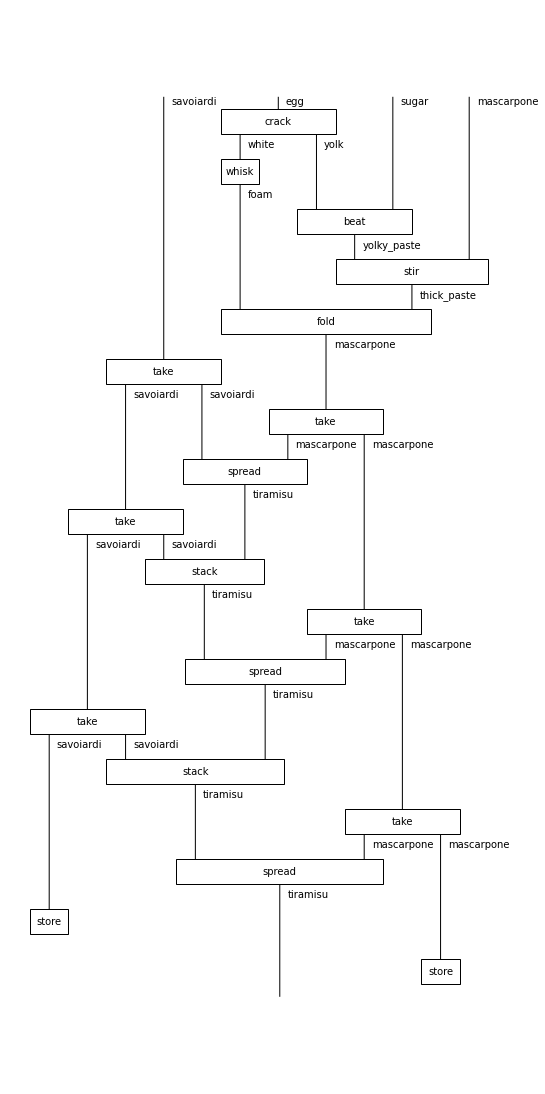

In [12]:
n=3

recipe = Id(savoiardi) @ make_mascarpone >>tiramisu_first_layer
    
for i in range(1,n):
    recipe = recipe >> tiramisu_next_layer

recipe = recipe >> store(savoiardi) @ Id(tiramisu) @ store(mascarpone)
recipe.draw(figsize=(7, 15))

## Exercise 1.3 (harder)
Define a function that takes a number `n` and returns the recipe for cracking `n` eggs.

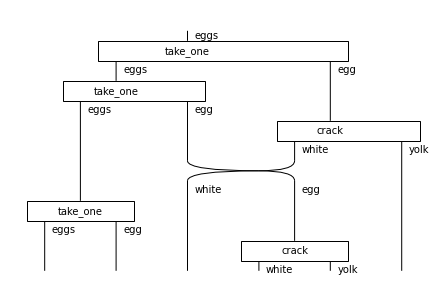

In [15]:
n = 10
eggs = Ty('eggs')
take_one = Box('take_one', eggs , eggs @ egg)

crack_n = take_one >> take_one @ crack >> Id(eggs) @ Swap(egg,white) @ Id(yolk) >> take_one @ Id(white) @ crack @ Id(yolk)

# for i in range n:

crack_n.draw()

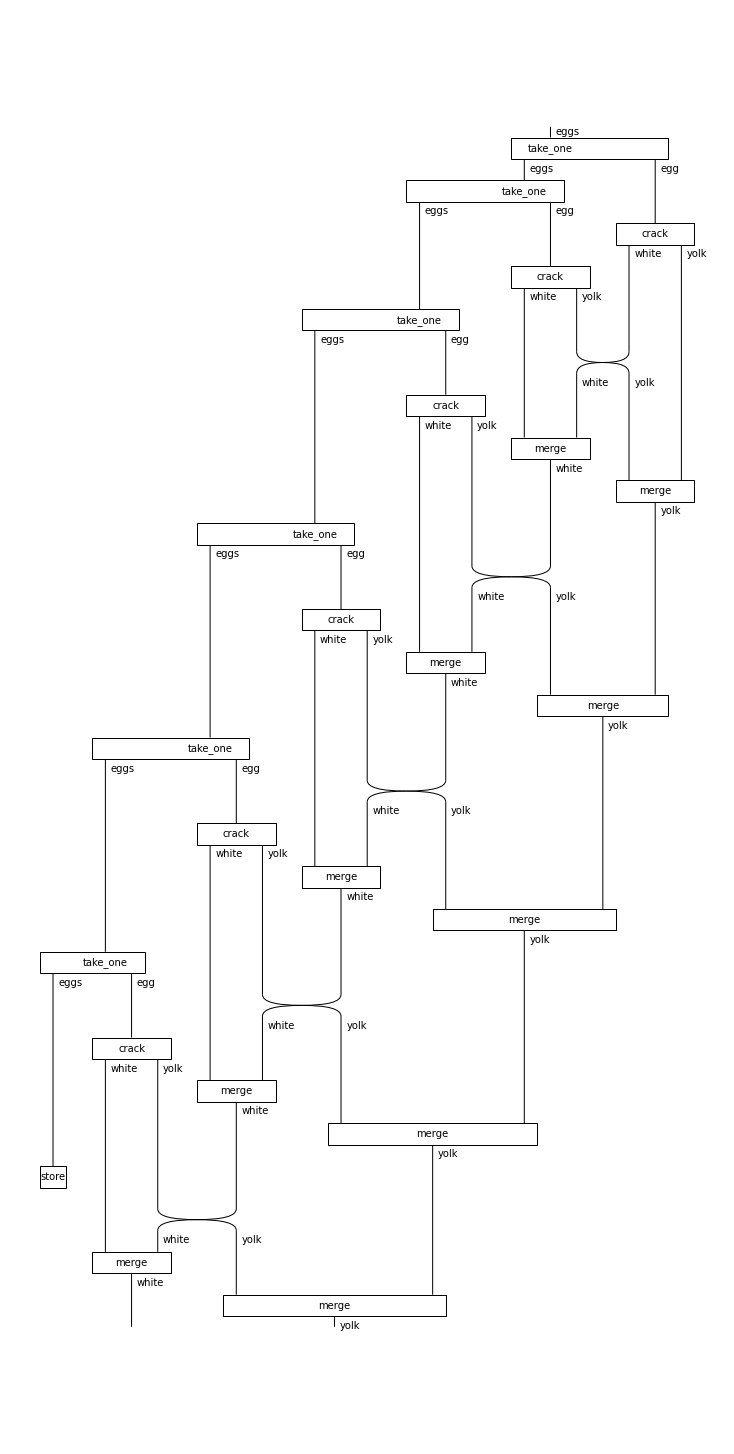

In [16]:
n = 6
eggs = Ty('eggs')
take_one = Box('take_one', eggs , eggs @ egg)

init = take_one >> take_one @ crack >> Id(eggs) @ crack @ Id(white) @ Id(yolk)

next_egg = take_one @Id(white) @Swap(yolk,white) @ Id(yolk)
next_egg = next_egg >> Id(eggs) @ crack @ merge(white) @ merge(yolk)

finish = store(eggs) @Id(white) @Swap(yolk,white) @ Id(yolk)
finish = finish >> merge(white) @ merge(yolk)

crack_n = init
for i in range(2,n):
    crack_n = crack_n >> next_egg
crack_n = crack_n >> finish
    
crack_n.draw(figsize=(10, 20))

Anything we can draw using boxes, tensor, composition and identities is called a `Diagram`. A diagram is uniquely defined by a domain, a codomain, a list of boxes and a list of _offsets_. The offset of a box encodes its $x$-coordinate as the number of wires passing to its left, its $y$-coordinate is given by its index in the list. For example:

In [17]:
def pretty(diagram):
    return "Diagram(\n"\
    + "    dom={},\n".format(repr(diagram.dom))\
    + "    cod={},\n".format(repr(diagram.cod))\
    + "    boxes=[{}],\n".format(',\n           '.join(map(repr, diagram.boxes)))\
    + "    offsets={})".format(diagram.offsets)

assertion = "assert crack_two_eggs == {}".format(pretty(crack_two_eggs))

exec(assertion)
print(assertion)

assert crack_two_eggs == Diagram(
    dom=Ty('egg', 'egg'),
    cod=Ty('white', 'yolk'),
    boxes=[Box('crack', Ty('egg'), Ty('white', 'yolk')),
           Box('crack', Ty('egg'), Ty('white', 'yolk')),
           Swap(Ty('yolk'), Ty('white')),
           Box('merge', Ty('white', 'white'), Ty('white')),
           Box('merge', Ty('yolk', 'yolk'), Ty('yolk'))],
    offsets=[0, 2, 1, 0, 1])


While `Diagram` is the core data structure of DisCoPy, `Functor` is its main algorithm. It is initialised by two mappings:

* `ob` maps objects (i.e. types of length `1`) to types,
* `ar` maps boxes to diagrams.

The functor takes a diagram, substitute each box by its image under the `ar` mapping and returns the resulting diagram. We can use this to "open a box", for example:

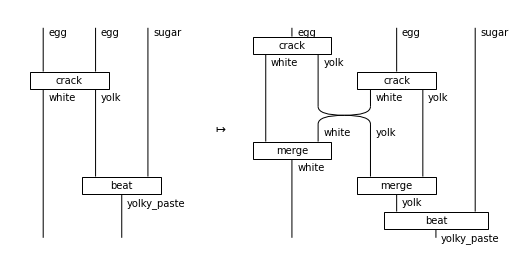

In [18]:
crack2 = Box("crack", egg @ egg, white @ yolk)

open_crack2 = Functor(
    ob=lambda x: x,
    ar={crack2: crack_two_eggs, beat: beat})

crack2_then_beat = crack2 @ Id(sugar) >> Id(white) @ beat

drawing.equation(
    crack2_then_beat,
    open_crack2(crack2_then_beat),
    symbol='$\\mapsto$', figsize=(7, 3.5))

Another example of a functor is the translation from English cooking to French cuisine.

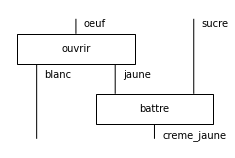

In [30]:
oeuf, blanc, jaune, sucre, creme_jaune = Ty("oeuf"), Ty("blanc"), Ty("jaune"), Ty("sucre"), Ty("creme_jaune")

ouvrir = Box("ouvrir", oeuf, blanc @ jaune)
battre = Box("battre", jaune @ sucre, creme_jaune)

english2french = Functor(
    ob={egg: oeuf,
        white: blanc,
        yolk: jaune,
        sugar: sucre,
        yolky_paste: creme_jaune},
    ar={crack: ouvrir,
        beat: battre})

english2french(crack_then_beat).draw(figsize=(3, 2))

Functors compose just like Python functions, e.g.

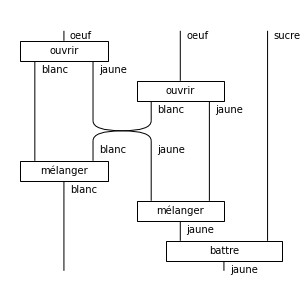

In [20]:
melanger = lambda x: Box("mélanger", x @ x, x)

for x in [white, yolk]:
    english2french.ar[merge(x)] = melanger(english2french(x))

english2french(open_crack2(crack2_then_beat)).draw(figsize=(4, 4))

# Exercise 1.4 
Define a functor that translate your favorite language to English, try composing it with `english2french`.

In [21]:
uovo, bianco, tuorlo, zucchero = Ty("uovo"), Ty("bianco"), Ty("tuorlo"), Ty("zucchero")

spaccare = Box("spaccare", uovo, bianco @ tuorlo)
sbattere = Box("sbattere", tuorlo @ zucchero, tuorlo)

spa_sba = spaccare @ Id(zucchero) >> Id(bianco) @ sbattere

italian2english = Functor(
    ob={uovo : egg,
        bianco: white,
        tuorlo: yolk,
        zucchero: sugar,
        tuorlo : yolky_paste},
    ar={spaccare: crack,
        sbattere: beat})

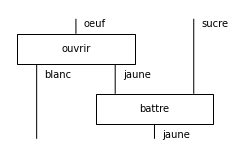

In [22]:
english2french(italian2english(spa_sba)).draw(figsize=(3, 2))

## Exercise 1.5
Define a `french2english` functor, check that it's the inverse of `english2french` on a small example.

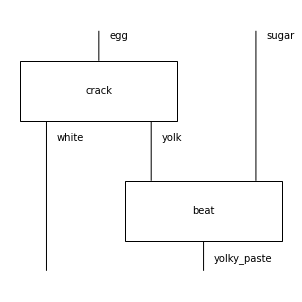

In [34]:
french2english = Functor(
    ob={oeuf: egg,
        blanc: white,
        jaune: yolk,
        sucre: sugar,
        creme_jaune: yolky_paste},
    ar={ouvrir: crack,
        battre: beat,
        melanger : merge})

french2english(english2french(crack_then_beat)).draw(figsize=(3, 2))

## References

* Coecke, B., Sadrzadeh, M., & Clark, S. (2010) _Mathematical foundations for a compositional distributional model of meaning._ [arXiv:1003.4394](https://arxiv.org/abs/1003.4394)
* Zeng, W., & Coecke, B.  (2016) _Quantum algorithms for compositional natural language processing._ [arXiv:1608.01406](https://arxiv.org/abs/arXiv:1608.01406)
* de Felice, G., Toumi, A., & Coecke, B. (2020) _DisCoPy: Monoidal Categories in Python._ [arXiv:2005.02975](https://arxiv.org/abs/2005.02975)
* Meichanetzidis, K., Toumi, A., de Felice, G., & Coecke, B. (2020) _Grammar-Aware Question-Answering on Quantum Computers._ [arXiv:2012.03756](https://arxiv.org/abs/arXiv:2012.03756)
* Meichanetzidis, K., Gogioso, S., De Felice, G., Chiappori, N., Toumi, A., & Coecke, B. (2020) _Quantum natural language processing on near-term quantum computers._ [arXiv:2005.04147](https://arxiv.org/abs/arXiv:2005.04147)